In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

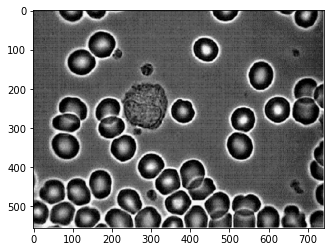

In [2]:
img = cv2.imread('blood.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img,cmap= 'gray')
plt.show()

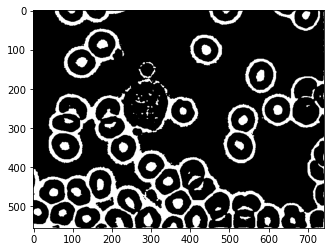

In [3]:
blur = cv2.GaussianBlur(img,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh,cmap= 'gray')
plt.show()

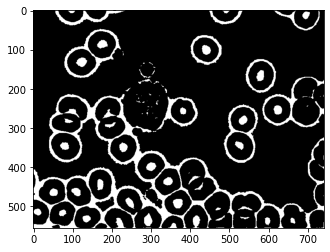

In [4]:
erode = cv2.erode(thresh,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)),iterations = 1)
plt.imshow(erode,cmap= 'gray')
plt.show()

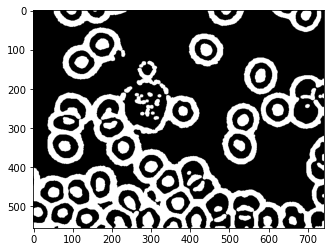

In [5]:
dilate = cv2.dilate(erode,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9)),iterations = 1)
plt.imshow(dilate,cmap= 'gray')
plt.show()

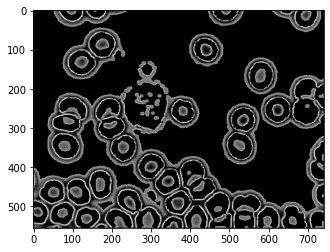

In [6]:
res = img * dilate
plt.imshow(res,cmap= 'gray')
plt.show()

In [7]:
circles = cv2.HoughCircles(res,cv2.HOUGH_GRADIENT,1,50,
                            param1=150,param2=25,minRadius=19,maxRadius=40)
circles.shape

(1, 40, 3)

In [8]:
cimg = img.copy()
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

(40, 3)

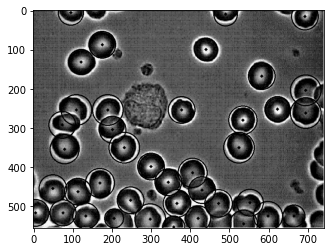

In [9]:
plt.imshow(cv2.cvtColor(cimg,cv2.COLOR_BGR2RGB))
circles[0].shape